<h1 align="center" style='color:#940e04;font-size:40px'>Titanic <span style="color: black">- Machine Learning from Disaster</span></h1>

download dataset from here [Titanic dataset](https://www.kaggle.com/c/titanic)

## Problem Statement :
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

## Objective :
To understand the "Titanic_dataset" and build a machine learning model(Classification Model) that can identify which sort of people were more likely to survive.

##  Data Dictionary :
**PassengerId** is the unique id of the row and it doesn't have any effect on target
<br> **Survived** is the target variable we are trying to predict (0 or 1):
<br>    &emsp; 1 = Survived
<br>    &emsp; 0 = Not Survived
<br> **Pclass** (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
<br>    &emsp; 1 = Upper Class
<br>    &emsp; 2 = Middle Class
<br>    &emsp; 3 = Lower Class
<br> **Name**, **Sex** and **Age** are self-explanatory
<br> **SibSp** is the total number of the passengers' siblings and spouse
<br> **Parch** is the total number of the passengers' parents and children
<br> **Ticket** is the ticket number of the passenger
<br> **Fare** is the passenger fare
<br> **Cabin** is the cabin number of the passenger
<br> **Embarked** is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
<br>    &emsp; C = Cherbourg
<br>    &emsp; Q = Queenstown
<br>    &emsp; S = Southampton

## Importing  Libraries

In [1]:
#### Importing libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

#### Ignore all warnings
warnings.filterwarnings('ignore')
#### allow plots to appear directly in the notebook
%matplotlib inline
#### set the maximum number of dataFrame columns display to unlimited
pd.set_option("display.max_columns", None)

## DATA ACQUISITION

In [2]:
#### loading train dataSet as pandas dataFrame
train_data = pd.read_csv('./Data/train_titanic.csv')
train_data.name = 'Train dataSet'

#### Let’s take a look at the top five rows of train dataset using the DataFrame’s head() method
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#### loading test dataSet as pandas dataFrame
test_data = pd.read_csv('./Data/test_titanic.csv')
test_data.name = 'Test dataSet'

#### Let’s take a look at the top five rows of test dataset using the DataFrame’s head() method
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#### checking dimensionality of the train and test dataSet
rows_train, cols_train = train_data.shape
print('\033[1m' + "Train Dataset :" + '\033[0m')
print(f'\tThe no.of rows = {rows_train}')
print(f'\tThe no.of columns = {cols_train}')
print('-'*50)
rows_test, cols_test = test_data.shape
print('\033[1m' + "Train Dataset :" + '\033[0m')
print(f'\tThe no.of rows = {rows_test}')
print(f'\tThe no.of columns = {cols_test}')

Train Dataset :
	The no.of rows = 891
	The no.of columns = 12
--------------------------------------------------
Train Dataset :
	The no.of rows = 418
	The no.of columns = 11


## DATA PREPROCESSING

In [5]:
'''
The info() method is useful to get a quick description of the data, in particular the total number of rows, 
and each attribute’s type and number of non-null values
'''
print('\033[1m' + "Info for Train dataset:" + '\033[0m')
print(train_data.info())
print('-'*40)
print('\033[1m' + "Info for Test dataset:" + '\033[0m')
print(test_data.info())

Info for Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
Info for Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
--- 

There are **891** instances in **train dataset** and **418** instances in **test dataset**. Notice that there are **null values** present in both **train** and **test** dataset.

In [6]:
#### Checking for sum of null values present in both train and test datset.
print('\033[1m' + "Sum of NULL values in Train dataSet:" + '\033[0m')
print(train_data.isnull().sum())
print('-'*20)
print('\033[1m' + "Sum of NULL values in Test dataSet:" + '\033[0m')
print(test_data.isnull().sum())

Sum of NULL values in Train dataSet:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
Sum of NULL values in Test dataSet:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


From above :
* The **Cabin** column contains **80%** of null values in both **Train** and **test dataset**.
* The **Age** column contains **18%** of null values in both **Train** and **Test** dataset.
* The **Embarked** column contains **2** null values in **Train dataset**.
* The **Fare** column contains **1** null values in **Test dataset**.

In [7]:
#### Dropping cabin column in both train and test dataset
train_data.drop("Cabin", axis=1, inplace = True)

test_data.drop("Cabin", axis=1, inplace = True)

In [8]:
#### Extracting the title from name column in both train and test dataset
train_test_data = [train_data, test_data]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    print('\033[1m' + dataset.name + '\033[0m')
    print(dataset['Title'].value_counts())
    print('-'*25)

Train dataSet
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Sir           1
Lady          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Ms            1
Name: Title, dtype: int64
-------------------------
Test dataSet
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64
-------------------------


**Title Map**
* Mr : 0
* Miss : 1
* Mrs: 2
* Others: 3

In [9]:
#### converting 'Title' column to numeric
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, 
                 "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3, "Ms": 3, "Lady": 3, 
                 "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [10]:
#### Filling null values in 'age' column based on 'Title'
train_data['Age'].fillna(train_data.groupby('Title')['Age'].transform('median'), inplace=True)

test_data['Age'].fillna(test_data.groupby('Title')['Age'].transform('median'), inplace=True)

**Age map:**
* child: 0
* young: 1
* adult: 2
* mid-age: 3
* senior: 4

In [11]:
#### Converting Numerical 'Age' to Categorical Variable
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset['Age'].replace(range(0, 17), 0, inplace=True)
    dataset['Age'].replace(range(17, 27), 1, inplace=True)
    dataset['Age'].replace(range(27, 37), 2, inplace=True)
    dataset['Age'].replace(range(37, 63), 3, inplace=True)
    dataset['Age'].replace(range(63, int(dataset['Age'].max())+1), 4, inplace=True)

In [12]:
#### Filling null values in 'Embarked' column 
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [13]:
#### Filling null values in 'Fare' column
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [14]:
#### Converting Numerical 'Fare' to Categorical Variable
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Fare'].replace(range(0, 17), 0, inplace=True)
    dataset['Fare'].replace(range(17, 31), 1, inplace=True)
    dataset['Fare'].replace(range(31, 101), 2, inplace=True)
    dataset['Fare'].replace(range(101, int(dataset['Fare'].max())+1), 3, inplace=True)

In [15]:
#### createing new fature FamilySize using 'SibSp' and 'Parch'
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [16]:
#### Checking for unique values present in the categorical features.
for dataset in train_test_data:
    print('\033[1m' + dataset.name + '\033[0m')
    for i in ['Sex', 'Embarked']:
        print(i, ':\n', dataset[i].unique())
        print()

Train dataSet
Sex :
 ['male' 'female']

Embarked :
 ['S' 'C' 'Q']

Test dataSet
Sex :
 ['male' 'female']

Embarked :
 ['Q' 'S' 'C']



In [17]:
#### Dropping unnecessary features in both Train and Test dataset
train_data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

PassengerId = list(test_data['PassengerId'])
test_data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

## EXPLATORY DATA ANALYSIS & DATA VISUALIZATION

In [18]:
#### The describe() method shows a summary of the nummerical attributes.
i=0
for dataset in train_test_data:
    print('\033[1m' + dataset.name + '\033[0m')
    display(dataset.describe().T.round(decimals = 2))
    if i == 0: print('-'*50)
    i = i+1

Train dataSet


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.31,0.84,1.0,2.0,3.0,3.0,3.0
Age,891.0,1.71,0.97,0.0,1.0,2.0,2.0,4.0
Fare,891.0,0.76,0.96,0.0,0.0,0.0,2.0,3.0
Title,891.0,0.71,0.97,0.0,0.0,0.0,1.0,3.0
FamilySize,891.0,1.90,1.61,1.0,1.0,1.0,2.0,11.0


--------------------------------------------------
Test dataSet


,count,mean,std,min,25%,50%,75%,max
Pclass,418.0,2.27,0.84,1.0,1.0,3.0,3.0,3.0
Age,418.0,1.73,0.95,0.0,1.0,2.0,2.0,4.0
Fare,418.0,0.77,1.00,0.0,0.0,0.0,2.0,3.0
Title,418.0,0.73,0.97,0.0,0.0,0.0,1.0,3.0
FamilySize,418.0,1.84,1.52,1.0,1.0,1.0,2.0,11.0


In [19]:
#### The describe(include=['object']) method shows a summary of the object attributes.
i=0
for dataset in train_test_data:
    print('\033[1m' + dataset.name + '\033[0m')
    display(dataset.describe(include = ['object']).T)
    if i == 0: print('-'*30)
    i = i+1

Train dataSet


,count,unique,top,freq
Sex,891,2,male,577
Embarked,891,3,S,646


------------------------------
Test dataSet


,count,unique,top,freq
Sex,418,2,male,266
Embarked,418,3,S,270


In [20]:
#### Printing no of outliers in each column
outliers_columns_list = []
print('\033[1m' + 'Train dataSet :' + '\033[0m')
for i in train_data.select_dtypes(exclude='object').columns:
    q1 = train_data[i].quantile(0.25)
    q3 = train_data[i].quantile(0.75)
    IQR = q3-q1
    ub = q3+(1.5*IQR)
    lb = q1-(1.5*IQR)
    outliers_count=train_data[(train_data[i]>ub) | (train_data[i]<lb)][i].count()
    if(outliers_count>0):
        print(f"\t no of outliers in '{i}' is {outliers_count}")
        outliers_columns_list.append(i)

Train dataSet :
	 no of outliers in 'Age' is 15
	 no of outliers in 'Title' is 67
	 no of outliers in 'FamilySize' is 91


Train dataSet :


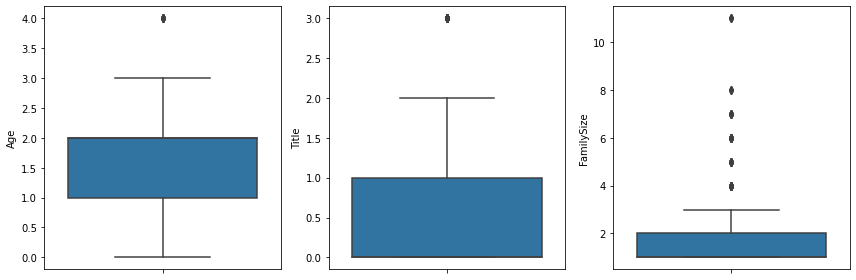

In [21]:
#### Box plot for the columns which contains outliers in train dataset
plt.figure(figsize=(12, 4))
print('\033[1m' + 'Train dataSet :' + '\033[0m')
for i in range(len(outliers_columns_list)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(train_data[outliers_columns_list[i]], orient="v")

plt.tight_layout()

From the above **boxplots** it is observed that there is no valid outliers present in dataset

In [22]:
#### Printing no of outliers in each column
outliers_columns_list = []
print('\033[1m' + 'Test dataSet :' + '\033[0m')
for i in test_data.select_dtypes(exclude='object').columns:
    q1 = test_data[i].quantile(0.25)
    q3 = test_data[i].quantile(0.75)
    IQR = q3-q1
    ub = q3+(1.5*IQR)
    lb = q1-(1.5*IQR)
    outliers_count=test_data[(test_data[i]>ub) | (test_data[i]<lb)][i].count()
    if(outliers_count>0):
        print(f"\t no of outliers in '{i}' is {outliers_count}")
        outliers_columns_list.append(i)

Test dataSet :
	 no of outliers in 'Age' is 7
	 no of outliers in 'Title' is 28
	 no of outliers in 'FamilySize' is 34


Test dataSet :


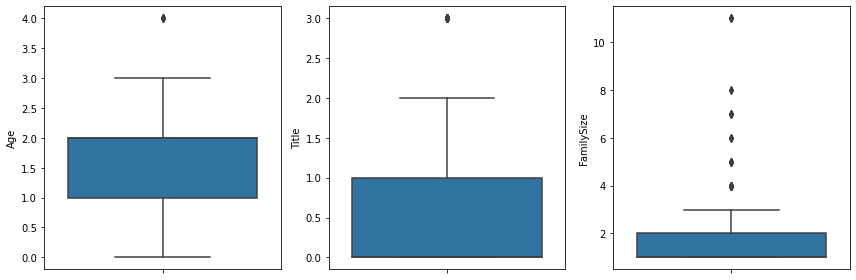

In [23]:
#### Box plot for the columns which contains outliers in test dataset
plt.figure(figsize=(12, 4))
print('\033[1m' + 'Test dataSet :' + '\033[0m')
for i in range(len(outliers_columns_list)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(test_data[outliers_columns_list[i]], orient="v")

plt.tight_layout()

From the above **boxplots** it is observed that there is no valid outliers present in dataset

0    0.616162
1    0.383838
Name: Survived, dtype: float64


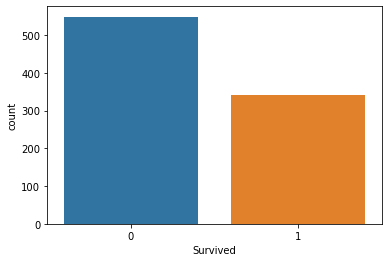

In [24]:
#### countplot to check the distribution of the target variable
print(train_data['Survived'].value_counts(normalize=True))
sns.countplot(train_data['Survived'])

**Observations :**
* Train dataset is imbalanced dataset
* 61.5% not survived
* 38.3% survived


In [25]:
#### Concatenating Train and Test dataset
data = pd.concat([train_data.drop('Survived', axis = 1) ,test_data]).reset_index(drop=True)
data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,male,1,0,S,0,2
1,1,female,3,2,C,2,2
2,3,female,1,0,S,1,1
3,1,female,2,2,S,2,2
4,3,male,2,0,S,0,1


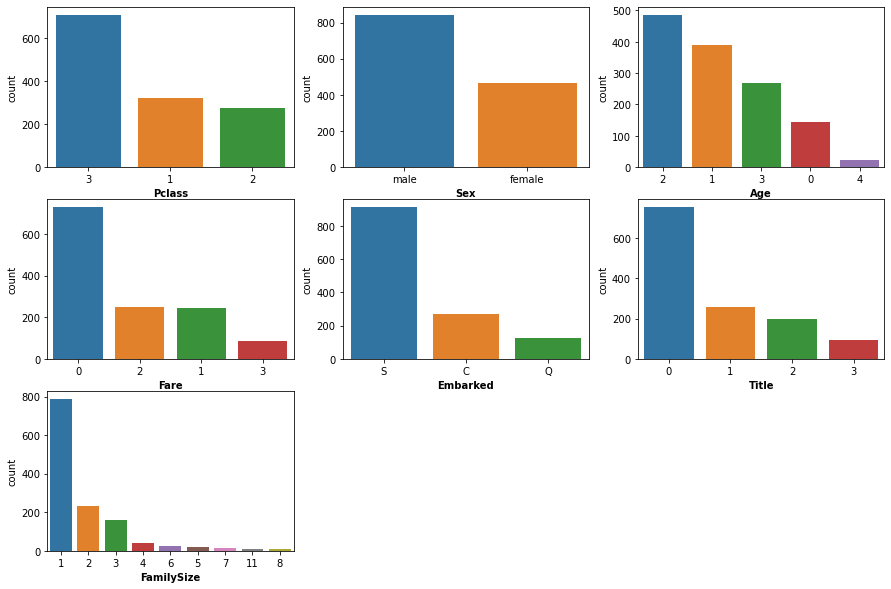

In [26]:
#### univarient analysis for all columns
plt.figure(figsize = (15, 10))
for i in range(len(data.columns)):
    plt.subplot(3, 3, i+1)
    sns.countplot(data[data.columns[i]], order = data[data.columns[i]].value_counts().index)
    plt.xlabel(data.columns[i], fontweight="bold")

**Observations:**
* The number of passengers are more in **Pclass(Passenger Class) 3**.
* **Male** passengers are more compared to **female**.
* **2(Young)** passengers are more and **4(Old-Age)** passengers are less.
* The number of passengers are more with **Fare 0(range from 0-17)**.
* More number of passengers from **Embarked S(Southampton)**.
* **Title Mr** are more compared to others.
* **Family Size 1** are more.

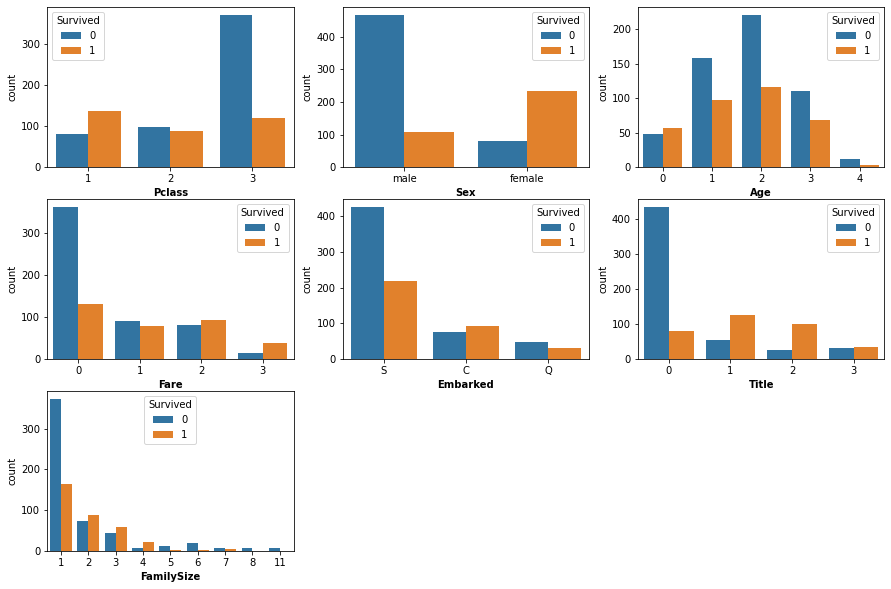

In [27]:
#### Bivarient analysis for all columns with survived
plt.figure(figsize = (15, 10))
for i in range(len(train_data.columns[1:])):
    plt.subplot(3, 3, i+1)
    sns.countplot(train_data[train_data.columns[i+1]], hue=train_data["Survived"])
    plt.xlabel(train_data.columns[i+1], fontweight="bold")

**Observations:**
* Third class is most likely to not survive by chart **pclass**.
* Females are most likely to survive from the chart **sex**.
* Childerns are most likely to survive from the chart **Age**.
* High Fare are most likely to survive from the chart **Fare**.
* If you embarked from Southampton (S), you are not likely to survive according to the **embarked** chart.
* Miss, Mrs are most likely to survive from the chart **Title**.
* If you are Family size is 1 on board, you are not likely to survive according to chart **FamilySize**.

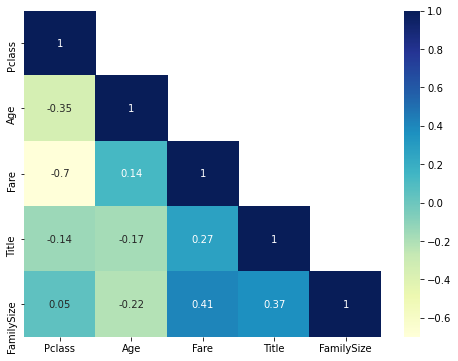

In [28]:
#### heatmap to visualize the pearson's correlation matrix between the numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", mask=np.triu(data.corr(), k=1))

From the above visuals we can see that no two columns are highly correlated

## LABEL ENCODING

In [29]:
#### Converting 'Sex' column to numeric
train_data['Sex'].replace({'male':1,
                          'female':2
                          }, inplace=True)

test_data['Sex'].replace({'male':1,
                          'female':2
                          }, inplace=True)

In [30]:
#### Converting 'Embarked' column to numeric
train_data = pd.get_dummies(columns = ['Embarked'], data = train_data, drop_first = True)

test_data = pd.get_dummies(columns = ['Embarked'], data = test_data, drop_first = True)

In [31]:
#### Creating dependent and independent variables
# independent variables
x = train_data.drop(columns="Survived")

# dependent variable
y = train_data["Survived"]

#### Splitting train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

## MODEL BUILDING
### Logistic Regression

In [32]:
#### Logistic Model instantiate and fit
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

In [33]:
#### Defining function for Classification Results
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def classification_results(model, xR, yR, ON):
    #### Predicting train
    yR_predict = model.predict(xR)

    #### Calculating accuracy score for train
    acc = accuracy_score(yR, yR_predict)
    print('\033[1m' + ON + ':' +'\033[0m')
    print(f'Accuracy : {acc}')
    print('-'*55)

    #### Classification report for train
    CR = classification_report(yR, yR_predict)
    print("classification report : \n", CR)
    print('-'*55)

    #### Confusion matrix for train
    CM = confusion_matrix(yR, yR_predict)
    print("Confusion matrix :\n", CM)
    sns.heatmap(CM, center = True, annot = True, fmt = 'g')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return(yR_predict, acc)

TRAIN:
Accuracy : 0.8105939004815409
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       375
           1       0.78      0.73      0.76       248

    accuracy                           0.81       623
   macro avg       0.80      0.80      0.80       623
weighted avg       0.81      0.81      0.81       623

-------------------------------------------------------
Confusion matrix :
 [[323  52]
 [ 66 182]]


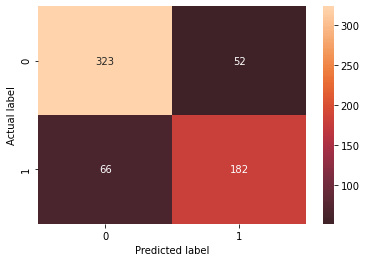

In [34]:
#### Classification Results on train
y_train_predict_LR, acc_train_LR = classification_results(model_LR, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8432835820895522
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       174
           1       0.76      0.81      0.78        94

    accuracy                           0.84       268
   macro avg       0.83      0.84      0.83       268
weighted avg       0.85      0.84      0.84       268

-------------------------------------------------------
Confusion matrix :
 [[150  24]
 [ 18  76]]


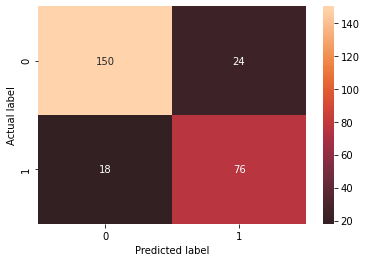

In [35]:
#### Classification Results on test
y_test_predict_LR, acc_test_LR = classification_results(model_LR, x_test, y_test, 'TEST')

In [36]:
#### defining function for ROC curve
import sklearn.metrics as metrics

def ROC_Curve(y_train, y_train_predict, y_test, y_test_predict):
    x,y = np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
    plt.plot(x, y, '--')

    #### Plot for train
    fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_predict)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, marker='o', label = 'Train AUC = %0.3f' % roc_auc_train)

    #### Plot for test
    fpr_test, tpr_test ,thresholds = metrics.roc_curve(y_test, y_test_predict)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, marker='o', label = 'Test AUC = %0.3f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return(roc_auc_train, roc_auc_test)

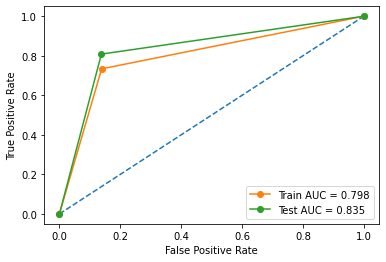

In [37]:
#### Plotting ROC Curve
roc_auc_train_LR, roc_auc_test_LR = ROC_Curve(y_train, y_train_predict_LR, y_test, y_test_predict_LR)

In [38]:
final_results = []
dict_LR = {'MODEL':'Logistic Regression',
           'Train_ACCURACY' : acc_train_LR,
           'Test_ACCURACY' : acc_test_LR,
           'Train_AUC' : roc_auc_train_LR,
           'Test_AUC' : roc_auc_test_LR
          }
final_results.append(dict_LR)

In [39]:
final_results

[{'MODEL': 'Logistic Regression',
  'Train_ACCURACY': 0.8105939004815409,
  'Test_ACCURACY': 0.8432835820895522,
  'Train_AUC': 0.7976021505376344,
  'Test_AUC': 0.8352898019075569}]

### Name based classifier - GaussianNB

In [40]:
#### GaussianNB Model instantiate and fit
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB() 
model_gnb.fit(x_train, y_train)

GaussianNB()

TRAIN:
Accuracy : 0.8009630818619583
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       375
           1       0.74      0.77      0.75       248

    accuracy                           0.80       623
   macro avg       0.79      0.80      0.79       623
weighted avg       0.80      0.80      0.80       623

-------------------------------------------------------
Confusion matrix :
 [[309  66]
 [ 58 190]]


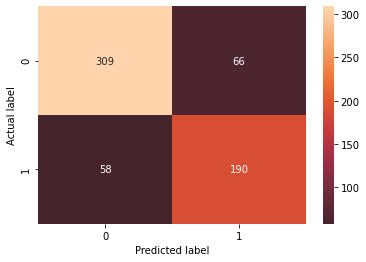

In [41]:
#### Classification Results on train
y_train_predict_gnb, acc_train_gnb = classification_results(model_gnb, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.835820895522388
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       174
           1       0.75      0.81      0.78        94

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.84      0.84       268

-------------------------------------------------------
Confusion matrix :
 [[148  26]
 [ 18  76]]


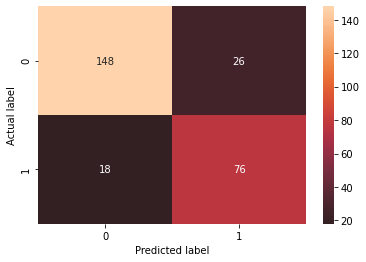

In [42]:
#### Classification Results on test
y_test_predict_gnb, acc_test_gnb = classification_results(model_gnb, x_test, y_test, 'TEST')

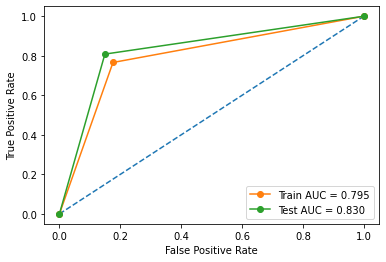

In [43]:
#### Plotting ROC Curve
roc_auc_train_gnb, roc_auc_test_gnb = ROC_Curve(y_train, y_train_predict_gnb, y_test, y_test_predict_gnb)

In [44]:
dict_gnb = {'MODEL':'GaussianNB',
           'Train_ACCURACY' : acc_train_gnb,
           'Test_ACCURACY' : acc_test_gnb,
           'Train_AUC' : roc_auc_train_gnb,
           'Test_AUC' : roc_auc_test_gnb
          }
final_results.append(dict_gnb)

### Name based classifier - BernoulliNB

In [45]:
#### BernoulliNB Model instantiate and fit
from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB() 
model_bnb.fit(x_train, y_train)

BernoulliNB()

TRAIN:
Accuracy : 0.7640449438202247
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       375
           1       0.69      0.73      0.71       248

    accuracy                           0.76       623
   macro avg       0.75      0.76      0.76       623
weighted avg       0.77      0.76      0.77       623

-------------------------------------------------------
Confusion matrix :
 [[294  81]
 [ 66 182]]


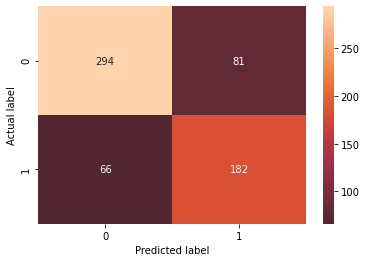

In [46]:
#### Classification Results on train
y_train_predict_bnb, acc_train_bnb = classification_results(model_bnb, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8246268656716418
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       174
           1       0.71      0.84      0.77        94

    accuracy                           0.82       268
   macro avg       0.81      0.83      0.81       268
weighted avg       0.84      0.82      0.83       268

-------------------------------------------------------
Confusion matrix :
 [[142  32]
 [ 15  79]]


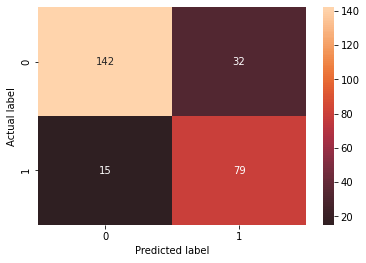

In [47]:
#### Classification Results on test
y_test_predict_bnb, acc_test_bnb = classification_results(model_bnb, x_test, y_test, 'TEST')

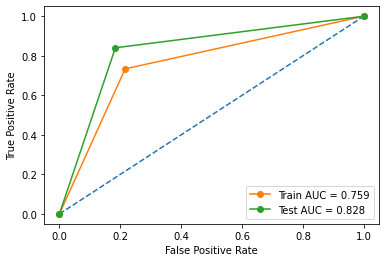

In [48]:
#### Plotting ROC Curve
roc_auc_train_bnb, roc_auc_test_bnb = ROC_Curve(y_train, y_train_predict_bnb, y_test, y_test_predict_bnb)

In [49]:
dict_bnb = {'MODEL':'BernoulliNB',
           'Train_ACCURACY' : acc_train_bnb,
           'Test_ACCURACY' : acc_test_bnb,
           'Train_AUC' : roc_auc_train_bnb,
           'Test_AUC' : roc_auc_test_bnb
          }
final_results.append(dict_bnb)

### Name based classifier - MultinomialNB

In [50]:
#### MultinomialNB Model instantiate and fit
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB() 
model_mnb.fit(x_train, y_train)

MultinomialNB()

TRAIN:
Accuracy : 0.7720706260032103
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       375
           1       0.74      0.66      0.70       248

    accuracy                           0.77       623
   macro avg       0.76      0.75      0.76       623
weighted avg       0.77      0.77      0.77       623

-------------------------------------------------------
Confusion matrix :
 [[318  57]
 [ 85 163]]


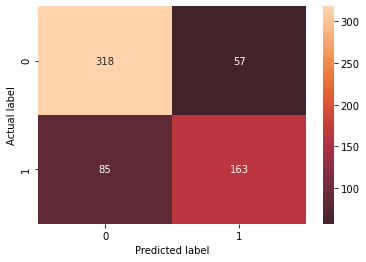

In [51]:
#### Classification Results on train
y_train_predict_mnb, acc_train_mnb = classification_results(model_mnb, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8246268656716418
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       174
           1       0.77      0.71      0.74        94

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

-------------------------------------------------------
Confusion matrix :
 [[154  20]
 [ 27  67]]


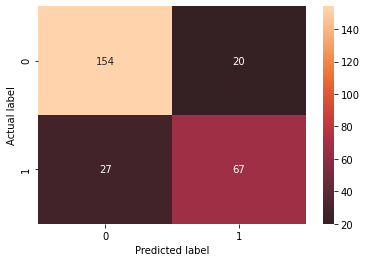

In [52]:
#### Classification Results on test
y_test_predict_mnb, acc_test_mnb = classification_results(model_mnb, x_test, y_test, 'TEST')

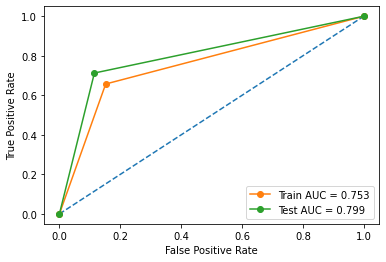

In [53]:
#### Plotting ROC Curve
roc_auc_train_mnb, roc_auc_test_mnb = ROC_Curve(y_train, y_train_predict_mnb, y_test, y_test_predict_mnb)

In [54]:
dict_mnb = {'MODEL' : 'MultinomialNB',
           'Train_ACCURACY' : acc_train_mnb,
           'Test_ACCURACY' : acc_test_mnb,
           'Train_AUC' : roc_auc_train_mnb,
           'Test_AUC' : roc_auc_test_mnb
          }
final_results.append(dict_mnb)

### Decision Tree Classifier

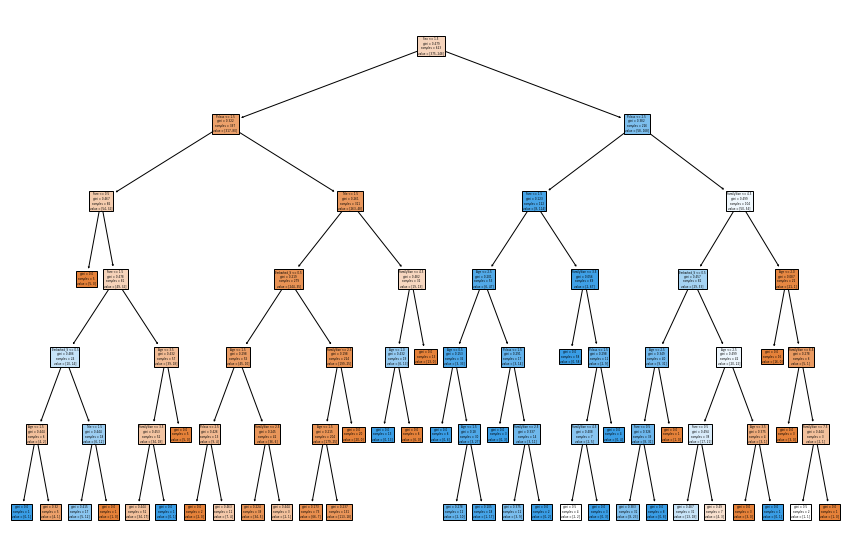

In [55]:
#### Decision Tree Classifier Model instantiate and fit
import sklearn.tree as tree
model_dtc=tree.DecisionTreeClassifier(max_depth=6,random_state=10)
model_dtc.fit(x_train,y_train)

#### Ploting Decision Tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,10))
plot_tree(model_dtc, feature_names=x_train.columns,filled = True)
plt.show()

TRAIN:
Accuracy : 0.8539325842696629
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       375
           1       0.86      0.76      0.81       248

    accuracy                           0.85       623
   macro avg       0.85      0.84      0.84       623
weighted avg       0.85      0.85      0.85       623

-------------------------------------------------------
Confusion matrix :
 [[343  32]
 [ 59 189]]


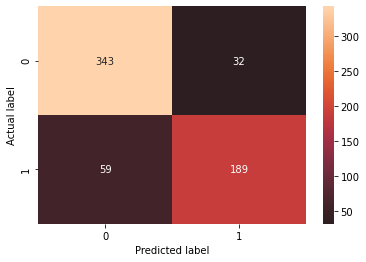

In [56]:
#### Classification Results on train
y_train_predict_dtc, acc_train_dtc = classification_results(model_dtc, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8246268656716418
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       174
           1       0.74      0.77      0.75        94

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268

-------------------------------------------------------
Confusion matrix :
 [[149  25]
 [ 22  72]]


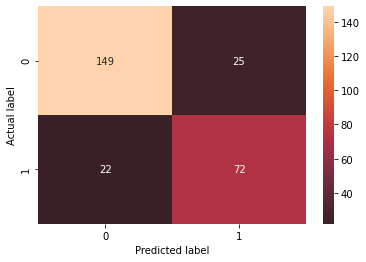

In [57]:
#### Classification Results on test
y_test_predict_dtc, acc_test_dtc = classification_results(model_dtc, x_test, y_test, 'TEST')

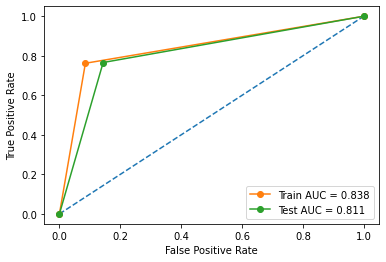

In [58]:
#### Plotting ROC Curve
roc_auc_train_dtc, roc_auc_test_dtc = ROC_Curve(y_train, y_train_predict_dtc, y_test, y_test_predict_dtc)

In [59]:
dict_dtc = {'MODEL' : 'Decision Tree classifier',
           'Train_ACCURACY' : acc_train_dtc,
           'Test_ACCURACY' : acc_test_dtc,
           'Train_AUC' : roc_auc_train_dtc,
           'Test_AUC' : roc_auc_test_dtc
          }
final_results.append(dict_dtc)

### KNN Classifier

In [60]:
#### KNN Classifier Model instantiate and fit
from sklearn import neighbors as nb
model_knn=nb.KNeighborsClassifier()

#### Parameter tuning/Grid search
import sklearn.model_selection as model_selection
model_knn=model_selection.GridSearchCV(model_knn,
                                       param_grid={'n_neighbors':[3,5,7],
                                                   'weights':['uniform','distance']},
                                      n_jobs = -1)
model_knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

TRAIN:
Accuracy : 0.8394863563402889
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       375
           1       0.82      0.77      0.79       248

    accuracy                           0.84       623
   macro avg       0.83      0.83      0.83       623
weighted avg       0.84      0.84      0.84       623

-------------------------------------------------------
Confusion matrix :
 [[332  43]
 [ 57 191]]


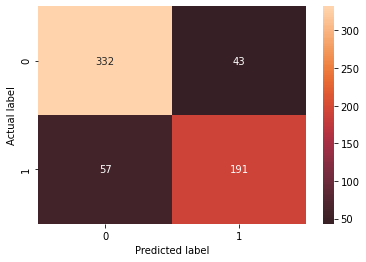

In [61]:
#### Classification Results on train
y_train_predict_knn, acc_train_knn = classification_results(model_knn, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.832089552238806
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       174
           1       0.74      0.81      0.77        94

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268

-------------------------------------------------------
Confusion matrix :
 [[147  27]
 [ 18  76]]


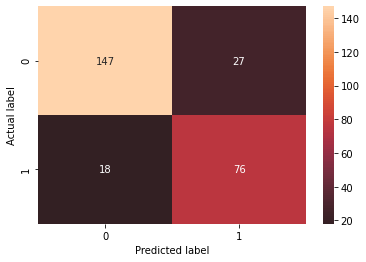

In [62]:
#### Classification Results on test
y_test_predict_knn, acc_test_knn = classification_results(model_knn, x_test, y_test, 'TEST')

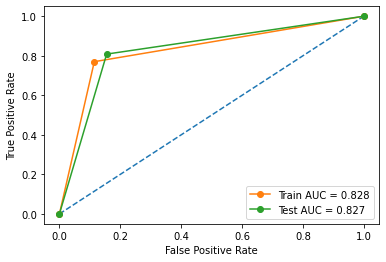

In [63]:
#### Plotting ROC Curve
roc_auc_train_knn, roc_auc_test_knn = ROC_Curve(y_train, y_train_predict_knn, y_test, y_test_predict_knn)

In [64]:
dict_knn = {'MODEL' : 'KNN classifier',
           'Train_ACCURACY' : acc_train_knn,
           'Test_ACCURACY' : acc_test_knn,
           'Train_AUC' : roc_auc_train_knn,
           'Test_AUC' : roc_auc_test_knn
          }
final_results.append(dict_knn)

### Random Forest Classifier

In [65]:
#### Random Forest Classifier Model instantiate and fit
from sklearn.ensemble import RandomForestClassifier
model_RFC=RandomForestClassifier()

#### Parameter tuning/Grid search
model_RFC=model_selection.GridSearchCV(model_RFC,
                                       param_grid={'n_estimators':[10,100,1000],
                                                   'max_features':['sqrt', 'log2']},
                                      n_jobs = -1)
model_RFC.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]})

TRAIN:
Accuracy : 0.8860353130016051
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       375
           1       0.89      0.81      0.85       248

    accuracy                           0.89       623
   macro avg       0.89      0.87      0.88       623
weighted avg       0.89      0.89      0.88       623

-------------------------------------------------------
Confusion matrix :
 [[351  24]
 [ 47 201]]


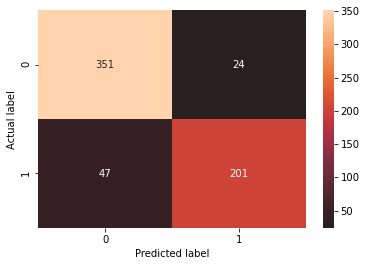

In [66]:
#### Classification Results on train
y_train_predict_RFC, acc_train_RFC = classification_results(model_RFC, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8134328358208955
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       174
           1       0.73      0.74      0.74        94

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

-------------------------------------------------------
Confusion matrix :
 [[148  26]
 [ 24  70]]


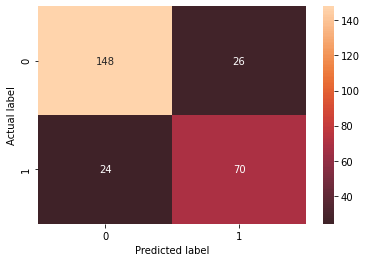

In [67]:
#### Classification Results on test
y_test_predict_RFC, acc_test_RFC = classification_results(model_RFC, x_test, y_test, 'TEST')

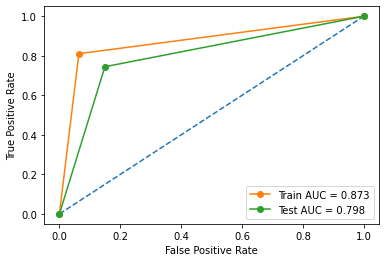

In [68]:
#### Plotting ROC Curve
roc_auc_train_RFC, roc_auc_test_RFC = ROC_Curve(y_train, y_train_predict_RFC, y_test, y_test_predict_RFC)

In [69]:
dict_RFC = {'MODEL' : 'Random Forest classifier',
           'Train_ACCURACY' : acc_train_RFC,
           'Test_ACCURACY' : acc_test_RFC,
           'Train_AUC' : roc_auc_train_RFC,
           'Test_AUC' : roc_auc_test_RFC
          }
final_results.append(dict_RFC)

### Stochastic Gradient Descent Classifier

In [70]:
#### Stochastic Gradient Descent classifier Model instantiate and fit
from sklearn.linear_model import SGDClassifier
model_SGDC = SGDClassifier()

#### Parameter tuning/Grid search
model_SGDC=model_selection.GridSearchCV(model_SGDC,
                                        param_grid={'loss':['hinge','modified_huber', 'log'],
                                                    'penalty':['l1', 'l1', 'elasticnet']},
                                        n_jobs = -1)
model_SGDC.fit(x_train, y_train)

GridSearchCV(estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'loss': ['hinge', 'modified_huber', 'log'],
                         'penalty': ['l1', 'l1', 'elasticnet']})

TRAIN:
Accuracy : 0.7849117174959872
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       375
           1       0.70      0.81      0.75       248

    accuracy                           0.78       623
   macro avg       0.78      0.79      0.78       623
weighted avg       0.79      0.78      0.79       623

-------------------------------------------------------
Confusion matrix :
 [[289  86]
 [ 48 200]]


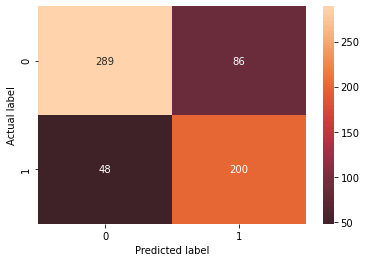

In [71]:
#### Classification Results on train
y_train_predict_SGDC, acc_train_SGDC = classification_results(model_SGDC, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.7873134328358209
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.90      0.76      0.82       174
           1       0.65      0.84      0.73        94

    accuracy                           0.79       268
   macro avg       0.78      0.80      0.78       268
weighted avg       0.81      0.79      0.79       268

-------------------------------------------------------
Confusion matrix :
 [[132  42]
 [ 15  79]]


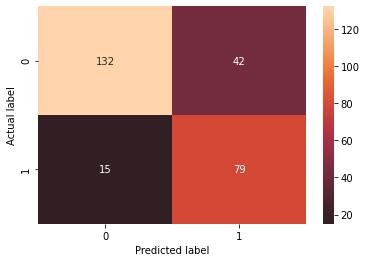

In [72]:
#### Classification Results on test
y_test_predict_SGDC, acc_test_SGDC = classification_results(model_SGDC, x_test, y_test, 'TEST')

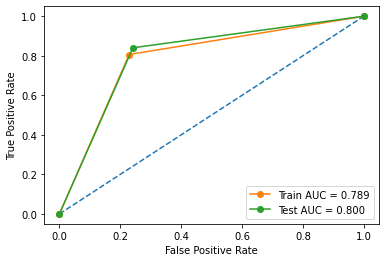

In [73]:
#### Plotting ROC Curve
roc_auc_train_SGDC, roc_auc_test_SGDC = ROC_Curve(y_train, y_train_predict_SGDC, y_test, y_test_predict_SGDC)

In [74]:
dict_SGDC = {'MODEL' : 'Stochastic Gradient Descent classifier',
           'Train_ACCURACY' : acc_train_SGDC,
           'Test_ACCURACY' : acc_test_SGDC,
           'Train_AUC' : roc_auc_train_SGDC,
           'Test_AUC' : roc_auc_test_SGDC
          }
final_results.append(dict_SGDC)

### Bagging Classifier

In [75]:
#### Bagging Classifier Model instantiate and fit
from sklearn.ensemble import BaggingClassifier
model_BC = BaggingClassifier()

#### Parameter tuning/Grid search
model_BC=model_selection.GridSearchCV(model_BC,
                                      param_grid={'n_estimators':list(range(10,100,10))},
                                      n_jobs = -1)
model_BC.fit(x_train, y_train)

GridSearchCV(estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

TRAIN:
Accuracy : 0.8860353130016051
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       375
           1       0.89      0.81      0.85       248

    accuracy                           0.89       623
   macro avg       0.89      0.87      0.88       623
weighted avg       0.89      0.89      0.89       623

-------------------------------------------------------
Confusion matrix :
 [[350  25]
 [ 46 202]]


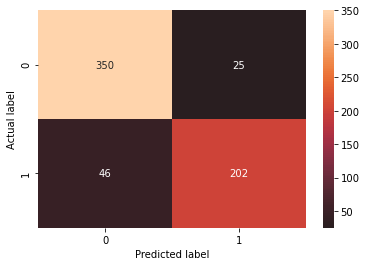

In [76]:
#### Classification Results on train
y_train_predict_BC, acc_train_BC = classification_results(model_BC, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8134328358208955
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       174
           1       0.72      0.76      0.74        94

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.82      0.81      0.81       268

-------------------------------------------------------
Confusion matrix :
 [[147  27]
 [ 23  71]]


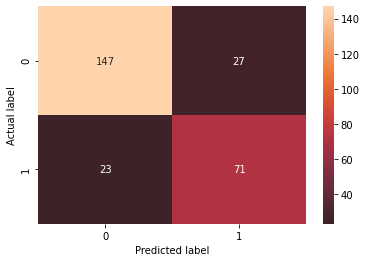

In [77]:
#### Classification Results on test
y_test_predict_BC, acc_test_BC = classification_results(model_BC, x_test, y_test, 'TEST')

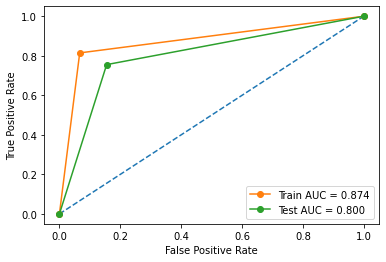

In [78]:
#### Plotting ROC Curve
roc_auc_train_BC, roc_auc_test_BC = ROC_Curve(y_train, y_train_predict_BC, y_test, y_test_predict_BC)

In [79]:
dict_BC = {'MODEL' : 'Bagging classifier',
           'Train_ACCURACY' : acc_train_BC,
           'Test_ACCURACY' : acc_test_BC,
           'Train_AUC' : roc_auc_train_BC,
           'Test_AUC' : roc_auc_test_BC
          }
final_results.append(dict_BC)

### AdaBoost Classifier

In [80]:
#### AdaBoost Classifierr Model instantiate and fit
from sklearn.ensemble import AdaBoostClassifier
model_ABC = AdaBoostClassifier()

#### Parameter tuning/Grid search
model_ABC=model_selection.GridSearchCV(model_ABC,
                                       param_grid={'n_estimators' : list(range(10,100,10)),
                                                    'algorithm' : ['SAMME', 'SAMME.R']},
                                       n_jobs = -1)
model_ABC.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

TRAIN:
Accuracy : 0.8089887640449438
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       375
           1       0.78      0.72      0.75       248

    accuracy                           0.81       623
   macro avg       0.80      0.79      0.80       623
weighted avg       0.81      0.81      0.81       623

-------------------------------------------------------
Confusion matrix :
 [[326  49]
 [ 70 178]]


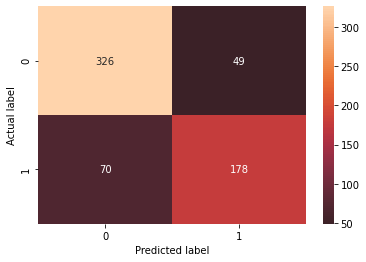

In [81]:
#### Classification Results on train
y_train_predict_ABC, acc_train_ABC = classification_results(model_ABC, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8283582089552238
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       174
           1       0.73      0.81      0.77        94

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268

-------------------------------------------------------
Confusion matrix :
 [[146  28]
 [ 18  76]]


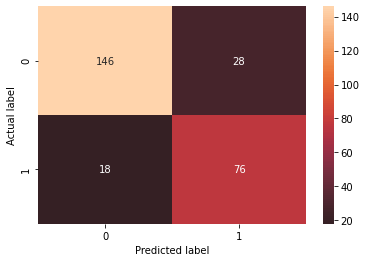

In [82]:
#### Classification Results on test
y_test_predict_ABC, acc_test_ABC = classification_results(model_ABC, x_test, y_test, 'TEST')

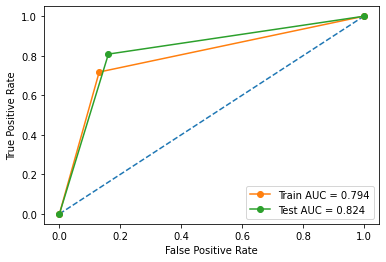

In [83]:
#### Plotting ROC Curve
roc_auc_train_ABC, roc_auc_test_ABC = ROC_Curve(y_train, y_train_predict_ABC, y_test, y_test_predict_ABC)

In [84]:
dict_ABC = {'MODEL' : 'AdaBoost classifier',
           'Train_ACCURACY' : acc_train_ABC,
           'Test_ACCURACY' : acc_test_ABC,
           'Train_AUC' : roc_auc_train_ABC,
           'Test_AUC' : roc_auc_test_ABC
          }
final_results.append(dict_ABC)

### GradientBoosting Classifier

In [85]:
#### AdaBoost Classifierr Model instantiate and fit
from sklearn.ensemble import GradientBoostingClassifier
model_GBC = GradientBoostingClassifier()

#### Parameter tuning/Grid search
model_GBC=model_selection.GridSearchCV(model_GBC,
                                       param_grid={'loss' : ['deviance', 'exponential'],
                                                   'n_estimators' : list(range(10,100,10)),
                                                   'criterion' : ['friedman_mse', 'mse', 'mae'],
                                                   'max_features' : ['auto', 'sqrt', 'log2']},
                                       n_jobs = -1)
model_GBC.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

TRAIN:
Accuracy : 0.8250401284109149
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       375
           1       0.82      0.72      0.77       248

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.81       623
weighted avg       0.82      0.83      0.82       623

-------------------------------------------------------
Confusion matrix :
 [[335  40]
 [ 69 179]]


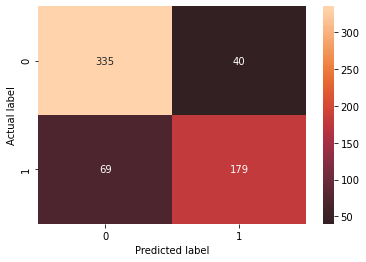

In [86]:
#### Classification Results on train
y_train_predict_GBC, acc_train_GBC = classification_results(model_GBC, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8283582089552238
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       174
           1       0.74      0.79      0.76        94

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268

-------------------------------------------------------
Confusion matrix :
 [[148  26]
 [ 20  74]]


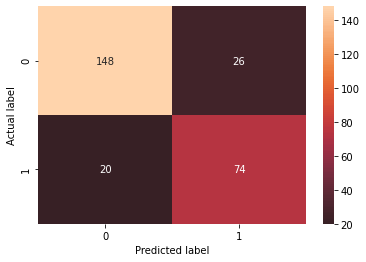

In [87]:
#### Classification Results on test
y_test_predict_GBC, acc_test_GBC = classification_results(model_GBC, x_test, y_test, 'TEST')

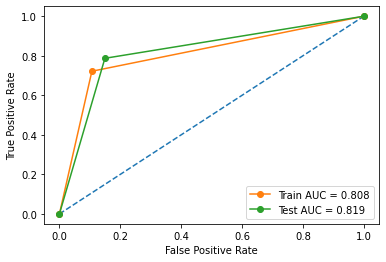

In [88]:
#### Plotting ROC Curve
roc_auc_train_GBC, roc_auc_test_GBC = ROC_Curve(y_train, y_train_predict_GBC, y_test, y_test_predict_GBC)

In [89]:
dict_GBC = {'MODEL' : 'AdaBoost classifier',
           'Train_ACCURACY' : acc_train_GBC,
           'Test_ACCURACY' : acc_test_GBC,
           'Train_AUC' : roc_auc_train_GBC,
           'Test_AUC' : roc_auc_test_GBC
          }
final_results.append(dict_GBC)

### HistGradientBoosting Classifier

In [90]:
#### HistGradientBoosting Classifier Model instantiate and fit
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
model_HGBC = HistGradientBoostingClassifier()
model_HGBC.fit(x_train, y_train)

HistGradientBoostingClassifier()

TRAIN:
Accuracy : 0.8587479935794543
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89       375
           1       0.87      0.76      0.81       248

    accuracy                           0.86       623
   macro avg       0.86      0.84      0.85       623
weighted avg       0.86      0.86      0.86       623

-------------------------------------------------------
Confusion matrix :
 [[346  29]
 [ 59 189]]


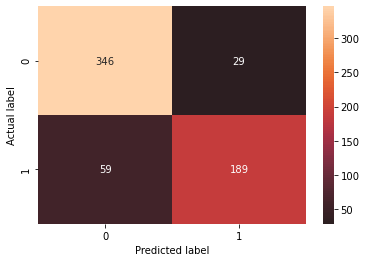

In [91]:
#### Classification Results on train
y_train_predict_HGBC, acc_train_HGBC = classification_results(model_HGBC, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.835820895522388
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       174
           1       0.76      0.78      0.77        94

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268

-------------------------------------------------------
Confusion matrix :
 [[151  23]
 [ 21  73]]


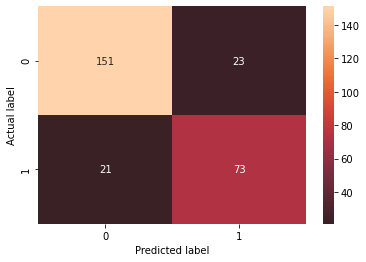

In [92]:
#### Classification Results on test
y_test_predict_HGBC, acc_test_HGBC = classification_results(model_HGBC, x_test, y_test, 'TEST')

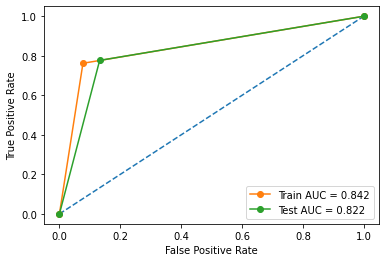

In [93]:
#### Plotting ROC Curve
roc_auc_train_HGBC, roc_auc_test_HGBC = ROC_Curve(y_train, y_train_predict_HGBC, y_test, y_test_predict_HGBC)

In [94]:
dict_HGBC = {'MODEL' : 'HistGradientBoosting Classifier',
           'Train_ACCURACY' : acc_train_HGBC,
           'Test_ACCURACY' : acc_test_HGBC,
           'Train_AUC' : roc_auc_train_HGBC,
           'Test_AUC' : roc_auc_test_HGBC
          }
final_results.append(dict_HGBC)

### XGBoost Classifier

In [95]:
#### AdaBoost Classifierr Model instantiate and fit
from xgboost import XGBClassifier
model_XGBC = XGBClassifier()
model_XGBC.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

TRAIN:
Accuracy : 0.8828250401284109
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       375
           1       0.91      0.79      0.84       248

    accuracy                           0.88       623
   macro avg       0.89      0.87      0.87       623
weighted avg       0.88      0.88      0.88       623

-------------------------------------------------------
Confusion matrix :
 [[355  20]
 [ 53 195]]


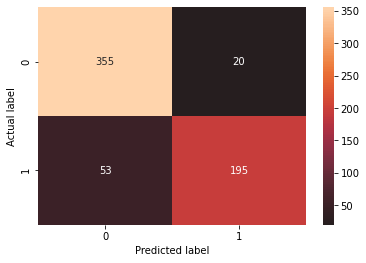

In [96]:
#### Classification Results on train
y_train_predict_XGBC, acc_train_XGBC = classification_results(model_XGBC, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.832089552238806
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       174
           1       0.78      0.73      0.75        94

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268

-------------------------------------------------------
Confusion matrix :
 [[154  20]
 [ 25  69]]


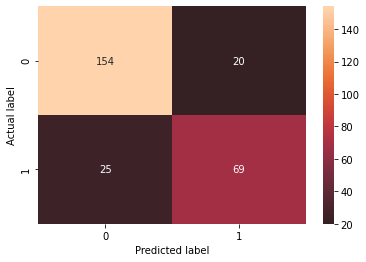

In [97]:
#### Classification Results on test
y_test_predict_XGBC, acc_test_XGBC = classification_results(model_XGBC, x_test, y_test, 'TEST')

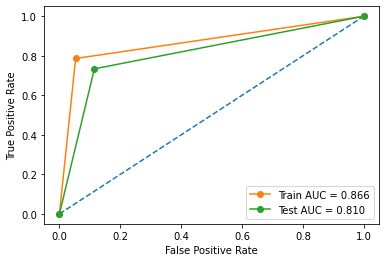

In [98]:
#### Plotting ROC Curve
roc_auc_train_XGBC, roc_auc_test_XGBC = ROC_Curve(y_train, y_train_predict_XGBC, y_test, y_test_predict_XGBC)

In [99]:
dict_XGBC = {'MODEL' : 'XGBoost Classifier',
           'Train_ACCURACY' : acc_train_XGBC,
           'Test_ACCURACY' : acc_test_XGBC,
           'Train_AUC' : roc_auc_train_XGBC,
           'Test_AUC' : roc_auc_test_XGBC
          }
final_results.append(dict_XGBC)

### VotingClassifier

In [100]:
from sklearn.ensemble import VotingClassifier
model_VC = VotingClassifier(estimators=[('BC', model_BC),
                                    ('XGBC', model_XGBC)],
                            voting = 'soft',
                            n_jobs = -1)
model_VC.fit(x_train, y_train)

VotingClassifier(estimators=[('BC',
                              GridSearchCV(estimator=BaggingClassifier(),
                                           n_jobs=-1,
                                           param_grid={'n_estimators': [10, 20,
                                                                        30, 40,
                                                                        50, 60,
                                                                        70, 80,
                                                                        90]})),
                             ('XGBC',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                       

TRAIN:
Accuracy : 0.884430176565008
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       375
           1       0.88      0.82      0.85       248

    accuracy                           0.88       623
   macro avg       0.88      0.87      0.88       623
weighted avg       0.88      0.88      0.88       623

-------------------------------------------------------
Confusion matrix :
 [[347  28]
 [ 44 204]]


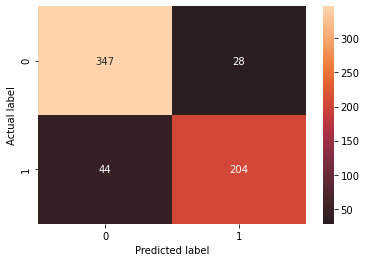

In [101]:
#### Classification Results on train
y_train_predict_VC, acc_train_VC = classification_results(model_VC, x_train, y_train, 'TRAIN')

TEST:
Accuracy : 0.8283582089552238
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       174
           1       0.75      0.77      0.76        94

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268

-------------------------------------------------------
Confusion matrix :
 [[150  24]
 [ 22  72]]


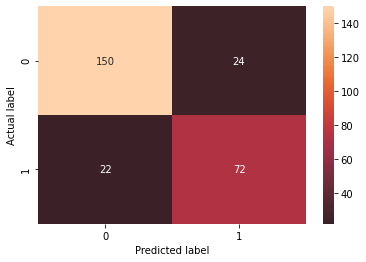

In [102]:
#### Classification Results on test
y_test_predict_VC, acc_test_VC = classification_results(model_VC, x_test, y_test, 'TEST')

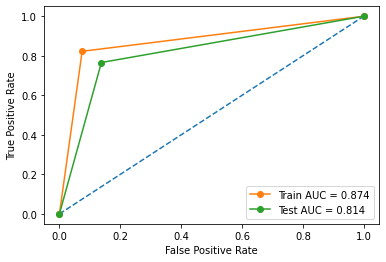

In [103]:
#### Plotting ROC Curve
roc_auc_train_VC, roc_auc_test_VC = ROC_Curve(y_train, y_train_predict_VC, y_test, y_test_predict_VC)

In [104]:
dict_VC = {'MODEL' : 'Voting Classifier',
           'Train_ACCURACY' : acc_train_VC,
           'Test_ACCURACY' : acc_test_VC,
           'Train_AUC' : roc_auc_train_VC,
           'Test_AUC' : roc_auc_test_VC
          }
final_results.append(dict_VC)

### Comparing ACCURACY and AUC for all models

In [105]:
df_results = pd.DataFrame(final_results)
df_results['ACCURACY'] = ((df_results['Train_ACCURACY']+df_results['Test_ACCURACY'])/2)*100
df_results['AUC'] = ((df_results['Train_AUC']+df_results['Test_AUC'])/2)*100

(df_results.sort_values(by=['ACCURACY','AUC'],ascending=False)
    .reset_index(drop=True)
    .style.background_gradient(cmap='Greens'))

,MODEL,Train_ACCURACY,Test_ACCURACY,Train_AUC,Test_AUC,ACCURACY,AUC
0,XGBoost Classifier,0.882825,0.832090,0.866478,0.809550,85.745730,83.801425
1,Voting Classifier,0.884430,0.828358,0.873957,0.814013,85.639419,84.398510
2,Bagging classifier,0.886035,0.813433,0.873925,0.800073,84.973407,83.699905
3,Random Forest classifier,0.886035,0.813433,0.873242,0.797628,84.973407,83.543486
4,HistGradientBoosting Classifier,0.858748,0.835821,0.842382,0.822206,84.728444,83.229382
5,Decision Tree classifier,0.853933,0.824627,0.838382,0.811140,83.927972,82.476068
6,KNN classifier,0.839486,0.832090,0.827747,0.826669,83.578795,82.720821
7,Logistic Regression,0.810594,0.843284,0.797602,0.835290,82.693874,81.644598
8,AdaBoost classifier,0.825040,0.828358,0.807554,0.818904,82.669917,81.322907
9,AdaBoost classifier,0.808989,0.828358,0.793538,0.823796,81.867349,80.866659


From the above results **XGBoost Classifier** gives best results for titanic dataset

### Predicting 'test_data' results using XGBoost Classifier

In [106]:
#### predicting test_data
y_testData_Predict = model_XGBC.predict(test_data)

In [114]:
df_sub = pd.DataFrame()
df_sub['PassengerId'] = PassengerId
df_sub['Survived'] = y_testData_Predict

df_sub.to_csv('submission.csv', header=True,index=False)

### Saving Model

In [115]:
import pickle
#### Saving model to disk
pickle.dump(model_XGBC, open('Titanic_model.pkl','wb'))

## Conclusion :

XGBoost Classifier gives best results for titanic dataset.

<h1 align='center'>Thank you🙂</h1>